# Extreme Gradient Boosting with XGBoost
#### Course Description
Do you know the basics of supervised learning and want to use state-of-the-art models on real-world datasets? Gradient boosting is currently one of the most popular techniques for efficient modeling of tabular datasets of all sizes. XGboost is a very fast, scalable implementation of gradient boosting, with models using XGBoost regularly winning online data science competitions and being used at scale across different industries. In this course, you'll learn how to use this powerful library alongside pandas and scikit-learn to build and tune supervised learning models. You'll work with real-world datasets to solve classification and regression problems.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams


import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

# 1. Classification with XGBoost

This chapter will introduce you to the fundamental idea behind XGBoost—boosted learners. Once you understand how XGBoost works, you'll apply it to solve a common classification problem found in industry: predicting whether a customer will stop being a customer at some point in the future.

### XGBoost: Fit/Predict
It's time to create your first XGBoost model! As Sergey showed you in the video, you can use the scikit-learn .fit() / .predict() paradigm that you are already familiar to build your XGBoost models, as the xgboost library has a scikit-learn compatible API!

Here, you'll be working with churn data. This dataset contains imaginary data from a ride-sharing app with user behaviors over their first month of app usage in a set of imaginary cities as well as whether they used the service 5 months after sign-up. It has been pre-loaded for you into a DataFrame called churn_data - explore it in the Shell!

Your goal is to use the first month's worth of data to predict whether the app's users will remain users of the service at the 5 month mark. This is a typical setup for a churn prediction problem. To do this, you'll split the data into training and test sets, fit a small xgboost model on the training set, and evaluate its performance on the test set by computing its accuracy.

pandas and numpy have been imported as pd and np, and train_test_split has been imported from sklearn.model_selection. Additionally, the arrays for the features and the target have been created as X and y.

#### Instructions


- Import xgboost as xgb.
- Create training and test sets such that 20% of the data is used for testing. Use a random_state of 123.
- Instantiate an XGBoostClassifier as xg_cl using xgb.XGBClassifier(). Specify n_estimators to be 10 estimators and an objective of 'binary:logistic'. Do not worry about what this means just yet, you will learn about these parameters later in this course.
- Fit xg_cl to the training set (X_train, y_train) using the .fit() method.
- Predict the labels of the test set (X_test) using the .predict() method and hit 'Submit Answer' to print the accuracy.

In [2]:
churn_data = pd.read_csv('data/bikes_rides_churn.csv', index_col=0)

In [3]:
# Create arrays for the features and the target: X, y
X, y = churn_data.iloc[:,:-1], churn_data.iloc[:,-1]

# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))


accuracy: 0.758200


### Decision trees
Your task in this exercise is to make a simple decision tree using scikit-learn's DecisionTreeClassifier on the breast cancer dataset that comes pre-loaded with scikit-learn.

This dataset contains numeric measurements of various dimensions of individual tumors (such as perimeter and texture) from breast biopsies and a single outcome value (the tumor is either malignant, or benign).

We've preloaded the dataset of samples (measurements) into X and the target values per tumor into y. Now, you have to split the complete dataset into training and testing sets, and then train a DecisionTreeClassifier. You'll specify a parameter called max_depth. Many other parameters can be modified within this model, and you can check all of them out here.

#### Instructions

- Import:
    - train_test_split from sklearn.model_selection.
    - DecisionTreeClassifier from sklearn.tree.
- Create training and test sets such that 20% of the data is used for testing. Use a random_state of 123.
- Instantiate a DecisionTreeClassifier called dt_clf_4 with a max_depth of 4. This parameter specifies the maximum number of successive split points you can have before reaching a leaf node.
- Fit the classifier to the training set and predict the labels of the test set.

In [4]:
breast_cancer = datasets.load_breast_cancer()

In [5]:
X = breast_cancer['data']
y = breast_cancer['target']
print(len(X),len(y))

569 569


In [6]:
# Import the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the classifier: dt_clf_4
dt_clf_4 = DecisionTreeClassifier(max_depth = 4)

# Fit the classifier to the training set
dt_clf_4.fit(X_train,y_train)

# Predict the labels of the test set: y_pred_4
y_pred_4 = dt_clf_4.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred_4==y_test))/y_test.shape[0]
print("accuracy:", accuracy)


accuracy: 0.9649122807017544


### Measuring accuracy
You'll now practice using XGBoost's learning API through its baked in cross-validation capabilities. As Sergey discussed in the previous video, XGBoost gets its lauded performance and efficiency gains by utilizing its own optimized data structure for datasets called a DMatrix.

In the previous exercise, the input datasets were converted into DMatrix data on the fly, but when you use the xgboost cv object, you have to first explicitly convert your data into a DMatrix. So, that's what you will do here before running cross-validation on churn_data.

#### Instructions

- Create a DMatrix called churn_dmatrix from churn_data using xgb.DMatrix(). The features are available in X and the labels in y.
- Perform 3-fold cross-validation by calling xgb.cv(). dtrain is your churn_dmatrix, params is your parameter dictionary, nfold is the number of cross-validation folds (3), num_boost_round is the number of trees we want to build (5), metrics is the metric you want to compute (this will be "error", which we will convert to an accuracy).

In [7]:
# Create arrays for the features and the target: X, y
X, y = churn_data.iloc[:,:-1], churn_data.iloc[:,-1]

# Create the DMatrix from X and y: churn_dmatrix
churn_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":3}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, 
                  nfold=3, num_boost_round=5, 
                  metrics="error", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))

   train-error-mean  train-error-std  test-error-mean  test-error-std
0           0.28232         0.002366          0.28378        0.001932
1           0.26951         0.001855          0.27190        0.001932
2           0.25605         0.003213          0.25798        0.003963
3           0.25090         0.001845          0.25434        0.003827
4           0.24654         0.001981          0.24852        0.000934
0.75148


### Measuring AUC
Now that you've used cross-validation to compute average out-of-sample accuracy (after converting from an error), it's very easy to compute any other metric you might be interested in. All you have to do is pass it (or a list of metrics) in as an argument to the metrics parameter of xgb.cv().

Your job in this exercise is to compute another common metric used in binary classification - the area under the curve ("auc"). As before, churn_data is available in your workspace, along with the DMatrix churn_dmatrix and parameter dictionary params.

#### Instructions

- Perform 3-fold cross-validation with 5 boosting rounds and "auc" as your metric.
- Print the "test-auc-mean" column of cv_results.

In [8]:
# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, 
                  nfold=3, num_boost_round=5, 
                  metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.768893       0.001544       0.767863      0.002820
1        0.790864       0.006758       0.789157      0.006846
2        0.815872       0.003900       0.814476      0.005997
3        0.822959       0.002018       0.821682      0.003912
4        0.827528       0.000769       0.826191      0.001937
0.826191


# 2. Regression with XGBoost

After a brief review of supervised regression, you'll apply XGBoost to the regression task of predicting house prices in Ames, Iowa. You'll learn about the two kinds of base learners that XGboost can use as its weak learners, and review how to evaluate the quality of your regression models.

### Decision trees as base learners
It's now time to build an XGBoost model to predict house prices - not in Boston, Massachusetts, as you saw in the video, but in Ames, Iowa! This dataset of housing prices has been pre-loaded into a DataFrame called df. If you explore it in the Shell, you'll see that there are a variety of features about the house and its location in the city.

In this exercise, your goal is to use trees as base learners. By default, XGBoost uses trees as base learners, so you don't have to specify that you want to use trees here with booster="gbtree".

xgboost has been imported as xgb and the arrays for the features and the target are available in X and y, respectively.

#### Instructions

- Split df into training and testing sets, holding out 20% for testing. Use a random_state of 123.
- Instantiate the XGBRegressor as xg_reg, using a seed of 123. Specify an objective of "reg:linear" and use 10 trees. Note: You don't have to specify booster="gbtree" as this is the default.
- Fit xg_reg to the training data and predict the labels of the test set. Save the predictions in a variable called preds.
- Compute the rmse using np.sqrt() and the mean_squared_error() function from sklearn.metrics, which has been pre-imported.

In [9]:
df = pd.read_csv('data/ames_housing_trimmed_processed.csv')

In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective= "reg:squarederror" ,booster= "gbtree", n_estimators= 10,
                          seed= 123)

# Fit the regressor to the training set
xg_reg.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(preds, y_test))
print("RMSE: %f" % (rmse))

RMSE: 28106.463641


### Linear base learners

Now that you've used trees as base models in XGBoost, let's use the other kind of base model that can be used with XGBoost - a linear learner. This model, although not as commonly used in XGBoost, allows you to create a regularized linear regression using XGBoost's powerful learning API. However, because it's uncommon, you have to use XGBoost's own non-scikit-learn compatible functions to build the model, such as xgb.train().

In order to do this you must create the parameter dictionary that describes the kind of booster you want to use (similarly to how you created the dictionary in Chapter 1 when you used xgb.cv()). The key-value pair that defines the booster type (base model) you need is "booster":"gblinear".

Once you've created the model, you can use the .train() and .predict() methods of the model just like you've done in the past.

Here, the data has already been split into training and testing sets, so you can dive right into creating the DMatrix objects required by the XGBoost learning API.

#### Instructions

- Create two DMatrix objects - DM_train for the training set (X_train and y_train), and DM_test (X_test and y_test) for the test set.
- Create a parameter dictionary that defines the "booster" type you will use ("gblinear") as well as the "objective" you will minimize ("reg:linear").
- Train the model using xgb.train(). You have to specify arguments for the following parameters: params, dtrain, and num_boost_round. Use 5 boosting rounds.
- Predict the labels on the test set using xg_reg.predict(), passing it DM_test. Assign to preds.
- Hit 'Submit Answer' to view the RMSE!

In [12]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(X_train, y_train)
DM_test =  xgb.DMatrix(X_test, y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:linear"}

# Train the model: xg_reg
xg_reg = xgb.train(params = params, dtrain= DM_train, num_boost_round= 5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

[16:56:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 44015.005038


### Evaluating model quality
It's now time to begin evaluating model quality.

Here, you will compare the RMSE and MAE of a cross-validated XGBoost model on the Ames housing data. As in previous exercises, all necessary modules have been pre-loaded and the data is available in the DataFrame df.

#### Instructions

- Perform 4-fold cross-validation with 5 boosting rounds and "rmse" as the metric.
- Extract and print the final boosting round RMSE.
- Now, adapt your code to compute the "mae" instead of the "rmse".

In [13]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5,
                    metrics='rmse', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)
print('\n')

# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0    141767.531250      429.448328   142980.433594    1193.789595
1    102832.542969      322.468976   104891.392578    1223.157953
2     75872.617188      266.473250    79478.937500    1601.344539
3     57245.650391      273.625908    62411.924805    2220.148314
4     44401.295899      316.422824    51348.281250    2963.379118


4    51348.28125
Name: test-rmse-mean, dtype: float64


In [14]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, 
                    metrics="mae", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-mae-mean"]).tail(1))

   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0   127343.572266     668.344199  127633.988282   2403.993968
1    89770.056641     456.949630   90122.498047   2107.907095
2    63580.791016     263.405561   64278.559571   1887.564512
3    45633.141602     151.886070   46819.167969   1459.813514
4    33587.092774      86.999470   35670.649414   1140.607637
4    35670.649414
Name: test-mae-mean, dtype: float64


### Using regularization in XGBoost
Having seen an example of l1 regularization in the video, you'll now vary the l2 regularization penalty - also known as "lambda" - and see its effect on overall model performance on the Ames housing dataset.

#### Instructions

- Create your DMatrix from X and y as before.
- Create an initial parameter dictionary specifying an "objective" of "reg:linear" and "max_depth" of 3.
- Use xgb.cv() inside of a for loop and systematically vary the "lambda" value by passing in the current l2 value (reg).
- Append the "test-rmse-mean" from the last boosting round for each cross-validated xgboost model.
- Hit 'Submit Answer' to view the results. What do you notice?

In [15]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:squarederror","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, 
                             num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

Best rmse as a function of l2:
    l2          rmse
0    1  52275.355469
1   10  57746.066406
2  100  76624.628907


### Visualizing individual XGBoost trees
Now that you've used XGBoost to both build and evaluate regression as well as classification models, you should get a handle on how to visually explore your models. Here, you will visualize individual trees from the fully boosted model that XGBoost creates using the entire housing dataset.

XGBoost has a plot_tree() function that makes this type of visualization easy. Once you train a model using the XGBoost learning API, you can pass it to the plot_tree() function along with the number of trees you want to plot using the num_trees argument.

#### Instructions

- Create a parameter dictionary with an "objective" of "reg:linear" and a "max_depth" of 2.
- Train the model using 10 boosting rounds and the parameter dictionary you created. Save the result in xg_reg.
- Plot the first tree using xgb.plot_tree(). It takes in two arguments - the model (in this case, xg_reg), and num_trees, which is 0-indexed. So to plot the first tree, specify num_trees=0.
- Plot the fifth tree.
- Plot the last (tenth) tree sideways. To do this, specify the additional keyword argument rankdir="LR".
- Use xgb.plot_importance() and pass in the trained model to generate the graph of feature importances.

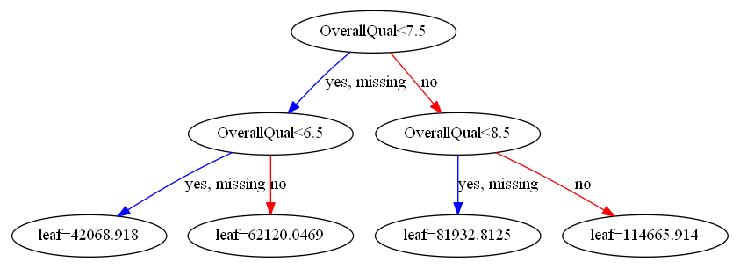

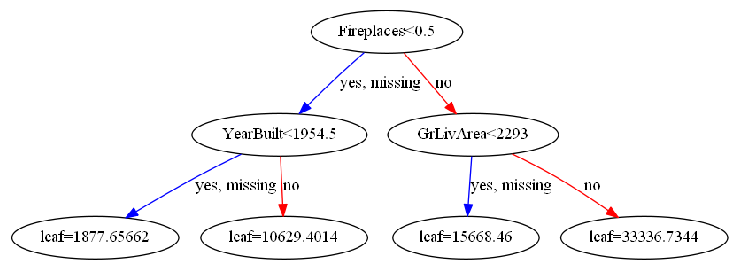

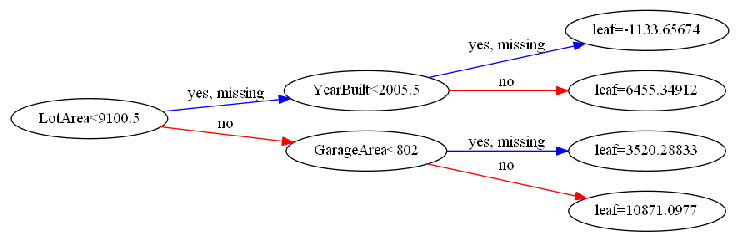

In [16]:

rcParams['figure.figsize'] = 13,13

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_reg, num_trees=0 )
plt.show()

# Plot the fifth tree
xgb.plot_tree(xg_reg, num_trees=4, aspect='auto' )
plt.show()

# Plot the last tree sideways
xgb.plot_tree(xg_reg, num_trees=9, rankdir="LR" )
plt.show()

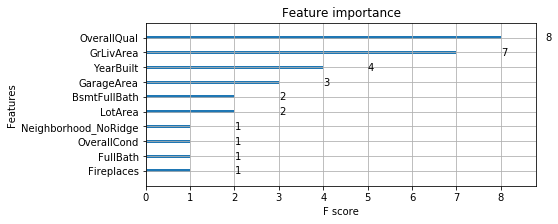

In [17]:
rcParams['figure.figsize'] = 7,3
# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

# 3. Fine-tuning your XGBoost model

This chapter will teach you how to make your XGBoost models as performant as possible. You'll learn about the variety of parameters that can be adjusted to alter the behavior of XGBoost and how to tune them efficiently so that you can supercharge the performance of your models.

### Tuning the number of boosting rounds
Let's start with parameter tuning by seeing how the number of boosting rounds (number of trees you build) impacts the out-of-sample performance of your XGBoost model. You'll use xgb.cv() inside a for loop and build one model per num_boost_round parameter.

Here, you'll continue working with the Ames housing dataset. The features are available in the array X, and the target vector is contained in y.

#### Instructions

- Create a DMatrix called housing_dmatrix from X and y.
- Create a parameter dictionary called params, passing in the appropriate "objective" ("reg:linear") and "max_depth" (set it to 3).
- Iterate over num_rounds inside a for loop and perform 3-fold cross-validation. In each iteration of the loop, pass in the current number of boosting rounds (curr_num_rounds) to xgb.cv() as the argument to num_boost_round.
- Append the final boosting round RMSE for each cross-validated XGBoost model to the final_rmse_per_round list.
- num_rounds and final_rmse_per_round have been zipped and converted into a DataFrame so you can easily see how the model performs with each boosting round. Hit 'Submit Answer' to see the results!



In [18]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(X,y)

# Create the parameter dictionary for each tree: params 
params = {"objective":"reg:squarederror", "max_depth":3}

# Create list of number of boosting rounds
num_rounds = [5, 10, 15]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

# Iterate over num_rounds and build one model per num_boost_round parameter
for curr_num_rounds in num_rounds:

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=curr_num_rounds, metrics="rmse", as_pandas=True, seed=123)
    
    # Append final round RMSE
    final_rmse_per_round.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))
print(pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","rmse"]))

   num_boosting_rounds          rmse
0                    5  50903.300782
1                   10  34774.192709
2                   15  32895.096354


### Automated boosting round selection using early_stopping
Now, instead of attempting to cherry pick the best possible number of boosting rounds, you can very easily have XGBoost automatically select the number of boosting rounds for you within xgb.cv(). This is done using a technique called early stopping.

Early stopping works by testing the XGBoost model after every boosting round against a hold-out dataset and stopping the creation of additional boosting rounds (thereby finishing training of the model early) if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds. Here you will use the early_stopping_rounds parameter in xgb.cv() with a large possible number of boosting rounds (50). Bear in mind that if the holdout metric continuously improves up through when num_boost_rounds is reached, then early stopping does not occur.

Here, the DMatrix and parameter dictionary have been created for you. Your task is to use cross-validation with early stopping. Go for it!

#### Instructions

- Perform 3-fold cross-validation with early stopping and "rmse" as your metric. Use 10 early stopping rounds and 50 boosting rounds. Specify a seed of 123 and make sure the output is a pandas DataFrame. Remember to specify the other parameters such as dtrain, params, and metrics.
- Print cv_results.

In [19]:
# Create the parameter dictionary for each tree: params
params= {"objective": "reg:squarederror", "max_depth": 4}

# Perform cross-validation with early stopping: cv_results
cv_results= xgb.cv(params= params, dtrain= housing_dmatrix, num_boost_round= 50,
                   early_stopping_rounds= 10, as_pandas= True, seed= 123, nfold=3,
                   metrics= "rmse" )

# Print cv_results
print(cv_results)

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0     141871.630208      403.632409   142640.645833     705.565658
1     103057.031250       73.772931   104907.666667     111.114933
2      75975.963542      253.734987    79262.059896     563.766991
3      57420.528646      521.655155    61620.135417    1087.690754
4      44552.955729      544.169200    50437.562500    1846.448017
5      35763.950521      681.797429    43035.660156    2034.469858
6      29861.464844      769.570645    38600.881511    2169.800969
7      25994.673177      756.520694    36071.817708    2109.795430
8      23306.833333      759.237086    34383.184896    1934.546688
9      21459.768880      745.624404    33509.141927    1887.377720
10     20148.720703      749.612103    32916.806641    1850.893136
11     19215.382161      641.388291    32197.834635    1734.458508
12     18627.388021      716.257152    31770.853516    1802.155409
13     17960.695312      557.043498    31482.782552    1779.12

### Tuning eta
It's time to practice tuning other XGBoost hyperparameters in earnest and observing their effect on model performance! You'll begin by tuning the "eta", also known as the learning rate.

The learning rate in XGBoost is a parameter that can range between 0 and 1, with higher values of "eta" penalizing feature weights more strongly, causing much stronger regularization.

#### Instructions

- Create a list called eta_vals to store the following "eta" values: 0.001, 0.01, and 0.1.
- Iterate over your eta_vals list using a for loop.
- In each iteration of the for loop, set the "eta" key of params to be equal to curr_val. Then, perform 3-fold cross-validation with early stopping (5 rounds), 10 boosting rounds, a metric of "rmse", and a seed of 123. Ensure the output is a DataFrame.
- Append the final round RMSE to the best_rmse list.

In [20]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:squarederror", "max_depth":3}

# Create list of eta values and empty list to store final round rmse per xgboost model
eta_vals = [0.001, 0.01, 0.1]
best_rmse = []

# Systematically vary the eta 
for curr_val in eta_vals:

    params["eta"] = curr_val
    
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain= housing_dmatrix, params= params, metrics= 'rmse',
                        nfold= 3, num_boost_round= 10, early_stopping_rounds= 5,
                        as_pandas= True, seed= 123)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(eta_vals, best_rmse)), columns=["eta","best_rmse"]))

     eta      best_rmse
0  0.001  195736.401042
1  0.010  179932.182292
2  0.100   79759.414063


### Tuning max_depth
In this exercise, your job is to tune max_depth, which is the parameter that dictates the maximum depth that each tree in a boosting round can grow to. Smaller values will lead to shallower trees, and larger values to deeper trees.

#### Instructions

- Create a list called max_depths to store the following "max_depth" values: 2, 5, 10, and 20.
- Iterate over your max_depths list using a for loop.
- Systematically vary "max_depth" in each iteration of the for loop and perform 2-fold cross-validation with early stopping (5 rounds), 10 boosting rounds, a metric of "rmse", and a seed of 123. Ensure the output is a DataFrame.

In [21]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params = {"objective" : "reg:squarederror"}

# Create list of max_depth values
max_depths = [2, 5, 10, 20]
best_rmse = []

# Systematically vary the max_depth
for curr_val in max_depths:

    params["max_depth"] = curr_val
    
    # Perform cross-validation
    cv_results = cv_results = xgb.cv(dtrain= housing_dmatrix, params= params,
                                     metrics= 'rmse', nfold= 2, num_boost_round= 10,
                                     early_stopping_rounds= 5, as_pandas= True,
                                     seed= 123)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(max_depths, best_rmse)),columns=["max_depth","best_rmse"]))

   max_depth     best_rmse
0          2  37957.468750
1          5  35596.599610
2         10  36065.546875
3         20  36739.578125


### Tuning colsample_bytree
Now, it's time to tune "colsample_bytree". You've already seen this if you've ever worked with scikit-learn's RandomForestClassifier or RandomForestRegressor, where it just was called max_features. In both xgboost and sklearn, this parameter (although named differently) simply specifies the fraction of features to choose from at every split in a given tree. In xgboost, colsample_bytree must be specified as a float between 0 and 1.

#### Instructions

- Create a list called colsample_bytree_vals to store the values 0.1, 0.5, 0.8, and 1.
- Systematically vary "colsample_bytree" and perform cross-validation, exactly as you did with max_depth and eta previously.

In [22]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params={"objective":"reg:squarederror","max_depth":3}

# Create list of hyperparameter values: colsample_bytree_vals
colsample_bytree_vals = [0.1, 0.5, 0.8, 1]
best_rmse = []

# Systematically vary the hyperparameter value 
for curr_val in colsample_bytree_vals:

    params['colsample_bytree'] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                 num_boost_round=10, early_stopping_rounds=5,
                 metrics="rmse", as_pandas=True, seed=123)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(colsample_bytree_vals, best_rmse)),
                   columns=["colsample_bytree","best_rmse"]))

   colsample_bytree     best_rmse
0               0.1  40918.115235
1               0.5  35813.906250
2               0.8  35995.679688
3               1.0  35836.044922


### Grid search with XGBoost
Now that you've learned how to tune parameters individually with XGBoost, let's take your parameter tuning to the next level by using scikit-learn's GridSearch and RandomizedSearch capabilities with internal cross-validation using the GridSearchCV and RandomizedSearchCV functions. You will use these to find the best model exhaustively from a collection of possible parameter values across multiple parameters simultaneously. Let's get to work, starting with GridSearchCV!

#### Instructions

- Create a parameter grid called gbm_param_grid that contains a list of "colsample_bytree" values (0.3, 0.7), a list with a single value for "n_estimators" (50), and a list of 2 "max_depth" (2, 5) values.
- Instantiate an XGBRegressor object called gbm.
- Create a GridSearchCV object called grid_mse, passing in: the parameter grid to param_grid, the XGBRegressor to estimator, "neg_mean_squared_error" to scoring, and 4 to cv. Also specify verbose=1 so you can better understand the output.
- Fit the GridSearchCV object to X and y.
- Print the best parameter values and lowest RMSE, using the .best_params_ and .best_score_ attributes, respectively, of grid_mse.

In [23]:
# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': [50],
    'max_depth': [2, 5]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator= gbm, param_grid= gbm_param_grid, scoring= "neg_mean_squared_error", cv= 4, verbose= True)


# Fit grid_mse to the data
grid_mse.fit(X,y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    2.7s finished


Best parameters found:  {'colsample_bytree': 0.3, 'max_depth': 5, 'n_estimators': 50}
Lowest RMSE found:  28986.18703093561


### Random search with XGBoost
Often, GridSearchCV can be really time consuming, so in practice, you may want to use RandomizedSearchCV instead, as you will do in this exercise. The good news is you only have to make a few modifications to your GridSearchCV code to do RandomizedSearchCV. The key difference is you have to specify a param_distributions parameter instead of a param_grid parameter.

#### Instructions

- Create a parameter grid called gbm_param_grid that contains a list with a single value for 'n_estimators' (25), and a list of 'max_depth' values between 2 and 11 for 'max_depth' - use range(2, 12) for this.
- Create a RandomizedSearchCV object called randomized_mse, passing in: the parameter grid to param_distributions, the XGBRegressor to estimator, "neg_mean_squared_error" to scoring, 5 to n_iter, and 4 to cv. Also specify verbose=1 so you can better understand the output.
- Fit the RandomizedSearchCV object to X and y.

In [24]:
# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'n_estimators': [25],
    'max_depth': range(2, 12)
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10)

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(estimator= gbm, param_distributions= gbm_param_grid,
                                    scoring= "neg_mean_squared_error", cv= 4, n_iter = 5, 
                                    verbose= True)


# Fit randomized_mse to the data
randomized_mse.fit(X,y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters found:  {'n_estimators': 25, 'max_depth': 4}
Lowest RMSE found:  29998.4522530019


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.7s finished


# 4. Using XGBoost in pipelines

Take your XGBoost skills to the next level by incorporating your models into two end-to-end machine learning pipelines. You'll learn how to tune the most important XGBoost hyperparameters efficiently within a pipeline, and get an introduction to some more advanced preprocessing techniques.

In [25]:
df = pd.read_csv('data/ames_unprocessed_data.csv')

### Encoding categorical columns I: LabelEncoder
Now that you've seen what will need to be done to get the housing data ready for XGBoost, let's go through the process step-by-step.

First, you will need to fill in missing values - as you saw previously, the column LotFrontage has many missing values. Then, you will need to encode any categorical columns in the dataset using one-hot encoding so that they are encoded numerically. You can watch this video from Supervised Learning with scikit-learn for a refresher on the idea.

The data has five categorical columns: MSZoning, PavedDrive, Neighborhood, BldgType, and HouseStyle. Scikit-learn has a LabelEncoder function that converts the values in each categorical column into integers. You'll practice using this here.

#### Instructions

- Import LabelEncoder from sklearn.preprocessing.
- Fill in missing values in the LotFrontage column with 0 using .fillna().
- Create a boolean mask for categorical columns. You can do this by checking for whether df.dtypes equals object.
- Create a LabelEncoder object. You can do this in the same way you instantiate any scikit-learn estimator.
- Encode all of the categorical columns into integers using LabelEncoder(). To do this, use the .fit_transform() method of le in the provided lambda function.

In [26]:
# Fill missing values with 0
df.LotFrontage = df.LotFrontage.fillna(0)

# Create a boolean mask for categorical columns
categorical_mask = (df.dtypes == object)

# Get list of categorical column names
categorical_columns = df.columns[categorical_mask].tolist()

# Print the head of the categorical columns
print(df[categorical_columns].head())



  MSZoning Neighborhood BldgType HouseStyle PavedDrive
0       RL      CollgCr     1Fam     2Story          Y
1       RL      Veenker     1Fam     1Story          Y
2       RL      CollgCr     1Fam     2Story          Y
3       RL      Crawfor     1Fam     2Story          Y
4       RL      NoRidge     1Fam     2Story          Y


### Encoding categorical columns II: OneHotEncoder
Okay - so you have your categorical columns encoded numerically. Can you now move onto using pipelines and XGBoost? Not yet! In the categorical columns of this dataset, there is no natural ordering between the entries. As an example: Using LabelEncoder, the CollgCr Neighborhood was encoded as 5, while the Veenker Neighborhood was encoded as 24, and Crawfor as 6. Is Veenker "greater" than Crawfor and CollgCr? No - and allowing the model to assume this natural ordering may result in poor performance.

As a result, there is another step needed: You have to apply a one-hot encoding to create binary, or "dummy" variables. You can do this using scikit-learn's OneHotEncoder.

#### Instructions

- Import OneHotEncoder from sklearn.preprocessing.
- Instantiate a OneHotEncoder object called ohe. Specify the keyword arguments categorical_features=categorical_mask and sparse=False.
- Using its .fit_transform() method, apply the OneHotEncoder to df and save the result as df_encoded. The output will be a NumPy array.
- Print the first 5 rows of df_encoded, and then the shape of df as well as df_encoded to compare the difference.

In [27]:
# New way of transforming to categorical data
categorical_transformer = ColumnTransformer([('encoder', OneHotEncoder(), 
                                              categorical_columns)], remainder='passthrough')

df_encoded = categorical_transformer.fit_transform(df)

# Print first 5 rows of the resulting dataset - again, this will no longer be a pandas dataframe
print(df_encoded[:5, :])

# Print the shape of the original DataFrame
print(df.shape)

# Print the shape of the transformed array
print(df_encoded.shape)


[[0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 1.000e+00 6.000e+01 6.500e+01 8.450e+03
  7.000e+00 5.000e+00 2.003e+03 0.000e+00 1.710e+03 1.000e+00 0.000e+00
  2.000e+00 1.000e+00 3.000e+00 0.000e+00 5.480e+02 2.085e+05]
 [0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 1.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 

### Encoding categorical columns III: DictVectorizer
Alright, one final trick before you dive into pipelines. The two step process you just went through - LabelEncoder followed by OneHotEncoder - can be simplified by using a DictVectorizer.

Using a DictVectorizer on a DataFrame that has been converted to a dictionary allows you to get label encoding as well as one-hot encoding in one go.

Your task is to work through this strategy in this exercise!

#### Instructions

- Import DictVectorizer from sklearn.feature_extraction.
- Convert df into a dictionary called df_dict using its .to_dict() method with "records" as the argument.
- Instantiate a DictVectorizer object called dv with the keyword argument sparse=False.
- Apply the DictVectorizer on df_dict by using its .fit_transform() method.
- Hit 'Submit Answer' to print the resulting first five rows and the vocabulary.

In [28]:
# Import DictVectorizer
from sklearn.feature_extraction import DictVectorizer

# Convert df into a dictionary: df_dict
df_dict = df.to_dict("records")

# Create the DictVectorizer object: dv
dv = DictVectorizer(sparse = False)

# Apply dv on df: df_encoded
df_encoded = dv.fit_transform(df_dict)

# Print the resulting first five rows
print(df_encoded[:5,:])

# Print the vocabulary
print(dv.vocabulary_)

[[3.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 2.000e+00 5.480e+02 1.710e+03 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  8.450e+03 6.500e+01 6.000e+01 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 5.000e+00 7.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.000e+00 2.085e+05 2.003e+03]
 [3.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e+00 1.000e+00 2.000e+00 4.600e+02 1.262e+03 0.000e+00 0.000e+00
  0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  9.600e+03 8.000e+01 2.000e+01 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 

In [29]:
df = pd.read_csv('data/ames_unprocessed_data.csv')
X = df.copy()[df.columns[:-1]]
y = df.copy()[df.columns[-1]]

In [30]:
# Fill LotFrontage missing values with 0
X.LotFrontage = X.LotFrontage.fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor())]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Fit the pipeline
xgb_pipeline.fit(X.to_dict('records'),y)

Pipeline(memory=None,
         steps=[('ohe_onestep',
                 DictVectorizer(dtype=<class 'numpy.float64'>, separator='=',
                                sort=True, sparse=False)),
                ('xgb_model',
                 XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
                              colsample_bynode=1, colsample_bytree=1, gamma=0,
                              gpu_id=-1, importance_type='gain',
                              interaction_constraints=None,
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=0, num_parallel_tree=1,
                              objective='reg:squarederror', random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method

### Cross-validating your XGBoost model
In this exercise, you'll go one step further by using the pipeline you've created to preprocess and cross-validate your model.

#### Instructions

- Create a pipeline called xgb_pipeline using steps.
- Perform 10-fold cross-validation using cross_val_score(). You'll have to pass in the pipeline, X (as a dictionary, using .to_dict("records")), y, the number of folds you want to use, and scoring ("neg_mean_squared_error").
- Print the 10-fold RMSE.

In [31]:
# Fill LotFrontage missing values with 0
X.LotFrontage = X.LotFrontage.fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor(max_depth=2, objective="reg:squarederror"))]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Cross-validate the model
cross_val_scores = cross_val_score(xgb_pipeline, X.to_dict("records"), y, cv=10, scoring="neg_mean_squared_error")

# Print the 10-fold RMSE
print("10-fold RMSE: ", np.mean(np.sqrt(np.abs(cross_val_scores))))

10-fold RMSE:  27683.04157118635


### Kidney disease case study I: Categorical Imputer
You'll now continue your exploration of using pipelines with a dataset that requires significantly more wrangling. The chronic kidney disease dataset contains both categorical and numeric features, but contains lots of missing values. The goal here is to predict who has chronic kidney disease given various blood indicators as features.

As Sergey mentioned in the video, you'll be introduced to a new library, sklearn_pandas, that allows you to chain many more processing steps inside of a pipeline than are currently supported in scikit-learn. Specifically, you'll be able to impute missing categorical values directly using the Categorical_Imputer() class in sklearn_pandas, and the DataFrameMapper() class to apply any arbitrary sklearn-compatible transformer on DataFrame columns, where the resulting output can be either a NumPy array or DataFrame.

We've also created a transformer called a Dictifier that encapsulates converting a DataFrame using .to_dict("records") without you having to do it explicitly (and so that it works in a pipeline). Finally, we've also provided the list of feature names in kidney_feature_names, the target name in kidney_target_name, the features in X, and the target in y.

In this exercise, your task is to apply the CategoricalImputer to impute all of the categorical columns in the dataset. You can refer to how the numeric imputation mapper was created as a template. Notice the keyword arguments input_df=True and df_out=True? This is so that you can work with DataFrames instead of arrays. By default, the transformers are passed a numpy array of the selected columns as input, and as a result, the output of the DataFrame mapper is also an array. Scikit-learn transformers have historically been designed to work with numpy arrays, not pandas DataFrames, even though their basic indexing interfaces are similar.

#### Instructions

- Apply the categorical imputer using DataFrameMapper() and CategoricalImputer(). CategoricalImputer() does not need any arguments to be passed in. The columns are contained in categorical_columns. Be sure to specify input_df=True and df_out=True, and use category_feature as your iterator variable in the list comprehension.

In [32]:
X = pd.read_csv('data/chronic_kidney_disease_features.csv', index_col=0)
y = pd.read_csv('data/chronic_kidney_target.csv', header=None)[0]

In [33]:
# Import necessary modules
from sklearn_pandas import DataFrameMapper
from sklearn_pandas import CategoricalImputer
from sklearn.impute import SimpleImputer as Imputer

# Check number of nulls in each feature column
nulls_per_column = X.isnull().sum()
print(nulls_per_column)

# Create a boolean mask for categorical columns
categorical_feature_mask = X.dtypes == object

# Get list of categorical column names
categorical_columns = X.columns[categorical_feature_mask].tolist()

# Get list of non-categorical column names
non_categorical_columns = X.columns[~categorical_feature_mask].tolist()

# Apply numeric imputer
numeric_imputation_mapper= DataFrameMapper([(
    [numeric_feature],Imputer(strategy="median")) for numeric_feature in non_categorical_columns],
    input_df=True,df_out=True )

# Apply categorical imputer
categorical_imputation_mapper = DataFrameMapper( 
    [(category_feature, CategoricalImputer()) for category_feature in categorical_columns],
    input_df=True,df_out=True
    )                                 

age        9
bp        12
sg        47
al        46
su        49
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wc       106
rc       131
rbc      152
pc        65
pcc        4
ba         4
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64


### Kidney disease case study II: Feature Union
Having separately imputed numeric as well as categorical columns, your task is now to use scikit-learn's FeatureUnion to concatenate their results, which are contained in two separate transformer objects - numeric_imputation_mapper, and categorical_imputation_mapper, respectively.

You may have already encountered FeatureUnion in Machine Learning with the Experts: School Budgets. Just like with pipelines, you have to pass it a list of (string, transformer) tuples, where the first half of each tuple is the name of the transformer.

#### Instructions

- Import FeatureUnion from sklearn.pipeline.
- Combine the results of numeric_imputation_mapper and categorical_imputation_mapper using FeatureUnion(), with the names "num_mapper" and "cat_mapper" respectively.


In [34]:
df_kidney= pd.read_csv('data/chronic_kidney_disease.csv', header=None)

### Kidney disease case study II: Feature Union
Having separately imputed numeric as well as categorical columns, your task is now to use scikit-learn's FeatureUnion to concatenate their results, which are contained in two separate transformer objects - numeric_imputation_mapper, and categorical_imputation_mapper, respectively.

You may have already encountered FeatureUnion in Machine Learning with the Experts: School Budgets. Just like with pipelines, you have to pass it a list of (string, transformer) tuples, where the first half of each tuple is the name of the transformer.

#### Instructions

- Import FeatureUnion from sklearn.pipeline.
- Combine the results of numeric_imputation_mapper and categorical_imputation_mapper using FeatureUnion(), with the names "num_mapper" and "cat_mapper" respectively.

In [35]:
# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

# Combine the numeric and categorical transformations
numeric_categorical_union = FeatureUnion([
                                          ("num_mapper", numeric_imputation_mapper),
                                          ("cat_mapper", categorical_imputation_mapper)
                                         ])

### Kidney disease case study III: Full pipeline
It's time to piece together all of the transforms along with an XGBClassifier to build the full pipeline!

Besides the numeric_categorical_union that you created in the previous exercise, there are two other transforms needed: the Dictifier() transform which we created for you, and the DictVectorizer().

After creating the pipeline, your task is to cross-validate it to see how well it performs.

#### Instructions

- Create the pipeline using the numeric_categorical_union, Dictifier(), and - DictVectorizer(sort=False) transforms, and xgb.XGBClassifier() estimator with max_depth=3. Name the transforms "featureunion", "dictifier" "vectorizer", and the estimator "clf".
- Perform 3-fold cross-validation on the pipeline using cross_val_score(). Pass it the pipeline, pipeline, the features, kidney_data, the outcomes, y. Also set scoring to "roc_auc" and cv to 3.

In [36]:
kidney_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv',
               'wc', 'rc', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
               'class']

kidney_data = pd.read_csv('data/chronic_kidney_disease.csv', names=kidney_cols, na_values= '?' )

In [37]:
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   bgr     248 non-null    object 
 6   bu      335 non-null    object 
 7   sc      396 non-null    object 
 8   sod     396 non-null    object 
 9   pot     356 non-null    float64
 10  hemo    381 non-null    float64
 11  pcv     383 non-null    float64
 12  wc      313 non-null    float64
 13  rc      312 non-null    float64
 14  rbc     348 non-null    float64
 15  pc      329 non-null    float64
 16  pcc     294 non-null    float64
 17  ba      269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [38]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
# Custom transformer to convert Pandas DataFrame into Dict (needed for DictVectorizer)
class Dictifier(BaseEstimator, TransformerMixin):       
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.to_dict('records')